# [WIP] Seasonal Cycle - California Underwater Glider Network

## Objective
Show how to use the California Underwater Glider Network (CUGN) data to plot the seasonal cycle.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

The CUGN seasonal data can be found at https://spraydata.ucsd.edu/climCUGN/.

The following command curl doesn't work for you, please download this data before proceeding. I'll later improve this notebook with a better way to access this data.

In [2]:
! curl -O https://spraydata.ucsd.edu/media/data/cugnclim/mean_ancycle_z_66.nc

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 67.7M  100 67.7M    0     0  10.7M      0  0:00:06  0:00:06 --:--:-- 12.2M


In [3]:
ds = xr.open_dataset("mean_ancycle_z_66.nc")

Using xarray we can load this NetCDF into an xarray Dataset object, which is a convenient framework for this job.

Let's check what we have.
If you're familiar with NetCDFs you'll notice that we get a data structure quite close to that.
For instance, this data is organized in three dimensions: time, depth, and distance from the coast.

In [4]:
ds

<xarray.Dataset>
Dimensions:                (depth: 50, distance: 81, time: 365)
Coordinates:
  * distance               (distance) float64 0.0 5.0 10.0 ... 390.0 395.0 400.0
  * depth                  (depth) float64 10.0 20.0 30.0 ... 480.0 490.0 500.0
  * time                   (time) object 0001-01-01 00:00:00 ... 0001-12-31 0...
    latitude               (distance) float64 ...
    longitude              (distance) float64 ...
Data variables:
    potential_temperature  (distance, time, depth) float64 ...
    temperature            (distance, time, depth) float64 ...
    density                (distance, time, depth) float64 ...
    salinity               (distance, time, depth) float64 ...
    geostrophic_velocity   (distance, time, depth) float64 ...
    potential_density      (distance, time, depth) float64 ...
Attributes:
    Conventions:                   CF-1.7, ACDD-1.3
    naming_authority:              edu.ucsd.spray
    references:                    Rudnick, D. L., K. D. Zaba, R. E. Todd, an...
    processing_level:              Only the data approved by a manual quality...
    acknowledgment:                Funded by National Oceanic and Atmospheric...
    standard_name_vocabulary:      CF Standard Name Table v40
    date_created:                  2017-04-06T22:16:44Z
    date_issued:                   2017-04-06T22:16:44Z
    creator_name:                  Daniel L. Rudnick
    creator_email:                 drudnick@ucsd.edu
    creator_url:                   http://chowder.ucsd.edu
    creator_type:                  individual
    creator_institution:           University of California - San Diego; Scri...
    institution:                   University of California - San Diego; Scri...
    project:                       Spray Underwater Glider
    publisher_name:                Instrument Development Group
    publisher_email:               idgdata@ucsd.edu
    publisher_url:                 http://spray.ucsd.edu
    publisher_type:                group
    publisher_institution:         University of California - San Diego; Scri...
    geospatial_bounds:             POLYGON ((35.08860055243809 -125.688367041...
    geospatial_bounds_crs:         EPSG:4326
    geospatial_lat_min:            35.08860055243809
    geospatial_lat_max:            36.89074003138525
    geospatial_lon_min:            -125.68836704123456
    geospatial_lon_max:            -121.83713210052696
    geospatial_vertical_min:       10
    geospatial_vertical_max:       500
    geospatial_vertical_positive:  down
    geospatial_vertical_units:     m
    time_coverage_start:           001-01-01T12:00:00Z
    time_coverage_end:             001-12-31T12:00:00Z
    contributor_name:              Rudnick, D. L., K. D. Zaba, R. E. Todd, an...
    contributor_role:              author, author, author, author, database m...
    product_version:               v2
    keywords_vocabulary:           GCMD Science Keywords
    instrument:                    Sea-Bird 41CP
    metadata_link:                 http://spraydata.ucsd.edu
    ctd_make_model:                Sea-Bird 41CP
    doi:                           10.21238/S8SPRAY7292

Notice that the variable time was automatically recognized as a time type, namely ``cftime.DatetimeNoLeap``.
Because of that we can jump in and do time operations without further setup.
For instance, let's check for each time record which season they are part of.

In [5]:
ds.time.dt.season

<xarray.DataArray 'season' (time: 365)>
array(['DJF', 'DJF', 'DJF', 'DJF', 'DJF', 'DJF', 'DJF', 'DJF', 'DJF',
       'DJF', 'DJF', 'DJF', 'DJF', 'DJF', 'DJF', 'DJF', 'DJF', 'DJF',
       'DJF', 'DJF', 'DJF', 'DJF', 'DJF', 'DJF', 'DJF', 'DJF', 'DJF',
       'DJF', 'DJF', 'DJF', 'DJF', 'DJF', 'DJF', 'DJF', 'DJF', 'DJF',
       'DJF', 'DJF', 'DJF', 'DJF', 'DJF', 'DJF', 'DJF', 'DJF', 'DJF',
       'DJF', 'DJF', 'DJF', 'DJF', 'DJF', 'DJF', 'DJF', 'DJF', 'DJF',
       'DJF', 'DJF', 'DJF', 'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'MAM',
       'MAM', 'MAM', 'MAM', 'MAM', 'MAM', 'MAM', 'MAM', 'MAM', 'MAM',
       'MAM', 'MAM', 'MAM', 'MAM', 'MAM', 'MAM', 'MAM', 'MAM', 'MAM',
       'MAM', 'MAM', 'MAM', 'MAM', 'MAM', 'MAM', 'MAM', 'MAM', 'MAM',
       'MAM', 'MAM', 'MAM', 'MAM', 'MAM', 'MAM', 'MAM', 'MAM', 'MAM',
       'MAM', 'MAM', 'MAM', 'MAM', 'MAM', 'MAM', 'MAM', 'MAM', 'MAM',
       'MAM', 'MAM', 'MAM', 'MAM', 'MAM', 'MAM', 'MAM', 'MAM', 'MAM',
       'MAM', 'MAM', 'MAM', 'MAM', 'MAM', 'MAM', 'MAM', 'MAM', 'MAM',
       'MAM', 'MAM', 'MAM', 'MAM', 'MAM', 'MAM', 'MAM', 'MAM', 'MAM',
       'MAM', 'MAM', 'MAM', 'MAM', 'MAM', 'MAM', 'MAM', 'MAM', 'MAM',
       'MAM', 'MAM', 'MAM', 'MAM', 'MAM', 'MAM', 'MAM', 'JJA', 'JJA',
       'JJA', 'JJA', 'JJA', 'JJA', 'JJA', 'JJA', 'JJA', 'JJA', 'JJA',
       'JJA', 'JJA', 'JJA', 'JJA', 'JJA', 'JJA', 'JJA', 'JJA', 'JJA',
       'JJA', 'JJA', 'JJA', 'JJA', 'JJA', 'JJA', 'JJA', 'JJA', 'JJA',
...
       'JJA', 'JJA', 'JJA', 'JJA', 'JJA', 'JJA', 'JJA', 'JJA', 'JJA',
       'JJA', 'JJA', 'JJA', 'JJA', 'JJA', 'JJA', 'JJA', 'JJA', 'JJA',
       'JJA', 'JJA', 'JJA', 'JJA', 'JJA', 'JJA', 'JJA', 'JJA', 'JJA',
       'JJA', 'JJA', 'JJA', 'JJA', 'JJA', 'JJA', 'JJA', 'JJA', 'JJA',
       'JJA', 'JJA', 'JJA', 'JJA', 'JJA', 'JJA', 'JJA', 'JJA', 'JJA',
       'JJA', 'JJA', 'JJA', 'JJA', 'JJA', 'JJA', 'JJA', 'JJA', 'JJA',
       'SON', 'SON', 'SON', 'SON', 'SON', 'SON', 'SON', 'SON', 'SON',
       'SON', 'SON', 'SON', 'SON', 'SON', 'SON', 'SON', 'SON', 'SON',
       'SON', 'SON', 'SON', 'SON', 'SON', 'SON', 'SON', 'SON', 'SON',
       'SON', 'SON', 'SON', 'SON', 'SON', 'SON', 'SON', 'SON', 'SON',
       'SON', 'SON', 'SON', 'SON', 'SON', 'SON', 'SON', 'SON', 'SON',
       'SON', 'SON', 'SON', 'SON', 'SON', 'SON', 'SON', 'SON', 'SON',
       'SON', 'SON', 'SON', 'SON', 'SON', 'SON', 'SON', 'SON', 'SON',
       'SON', 'SON', 'SON', 'SON', 'SON', 'SON', 'SON', 'SON', 'SON',
       'SON', 'SON', 'SON', 'SON', 'SON', 'SON', 'SON', 'SON', 'SON',
       'SON', 'SON', 'SON', 'SON', 'SON', 'SON', 'SON', 'SON', 'SON',
       'SON', 'DJF', 'DJF', 'DJF', 'DJF', 'DJF', 'DJF', 'DJF', 'DJF',
       'DJF', 'DJF', 'DJF', 'DJF', 'DJF', 'DJF', 'DJF', 'DJF', 'DJF',
       'DJF', 'DJF', 'DJF', 'DJF', 'DJF', 'DJF', 'DJF', 'DJF', 'DJF',
       'DJF', 'DJF', 'DJF', 'DJF', 'DJF'], dtype='<U3')
Coordinates:
  * time     (time) object 0001-01-01 00:00:00 ... 0001-12-31 00:00:00

Since we identify the seasons, let's group all records by season with `.groupby('time.season')`, and then average each group in respect to the time with `.mean('time')`.

In [6]:
seasonal = ds.groupby('time.season').mean('time')
seasonal

<xarray.Dataset>
Dimensions:                (depth: 50, distance: 81, season: 4)
Coordinates:
  * distance               (distance) float64 0.0 5.0 10.0 ... 390.0 395.0 400.0
  * depth                  (depth) float64 10.0 20.0 30.0 ... 480.0 490.0 500.0
    latitude               (distance) float64 36.89 36.87 36.85 ... 35.11 35.09
    longitude              (distance) float64 -121.8 -121.9 ... -125.6 -125.7
  * season                 (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    potential_temperature  (season, distance, depth) float64 nan nan ... 5.623
    temperature            (season, distance, depth) float64 nan nan ... 5.665
    density                (season, distance, depth) float64 nan nan ... 29.24
    salinity               (season, distance, depth) float64 nan nan ... 34.15
    geostrophic_velocity   (season, distance, depth) float64 nan ... -0.002475
    potential_density      (season, distance, depth) float64 nan nan ... 26.93

Notice that we now we get season instead of time.
Let's take a glance on this new result and see what is the average for December, January, and February together.

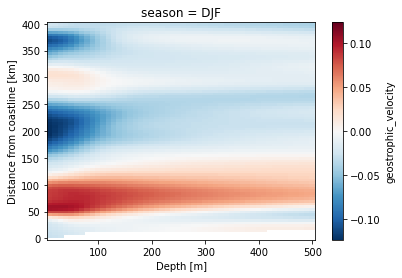

In [7]:
seasonal.geostrophic_velocity.sel(season="DJF").plot.pcolormesh()

This is the winter average of the geostrophic velocity along the line 66 of the CUGN.

[WIP] Let's build a plot with a little more control.

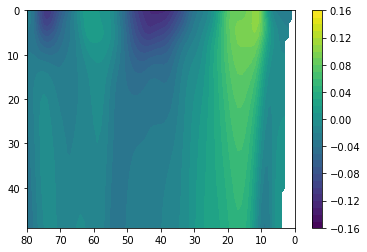

In [8]:
data = seasonal.sel(season="DJF")["geostrophic_velocity"]

fig = plt.figure()
ax = fig.add_subplot(111)
cmap = np.arange(-0.16, 0.17, 0.01)
c = ax.contourf(data.transpose("depth", "distance"), cmap)

fig.colorbar(c)

ax.invert_xaxis()

ax.invert_yaxis()

plt.show()